In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print('Train size:', train.shape)
print('Test size:', test.shape)

Train size: (1460, 81)
Test size: (1459, 80)


In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
def get_null_data(df):
    null_elems = df.isna().sum()
    null_ser = null_elems.iloc[null_elems.nonzero()]
    null_cols = null_ser.index
    null_types = [type(train[col][0]) for col in null_cols]
    return pd.DataFrame({'Num_Null_elems' : list(null_ser.values),
                         'Type' : null_types},
                         index = null_cols)

In [7]:
null_df_train = get_null_data(train)
null_df_train

,Num_Null_elems,Type
LotFrontage,259,<class 'numpy.float64'>
Alley,1369,<class 'float'>
MasVnrType,8,<class 'str'>
MasVnrArea,8,<class 'numpy.float64'>
BsmtQual,37,<class 'str'>
BsmtCond,37,<class 'str'>
BsmtExposure,38,<class 'str'>
BsmtFinType1,37,<class 'str'>
BsmtFinType2,38,<class 'str'>
Electrical,1,<class 'str'>


In [8]:
get_null_data(test)

,Num_Null_elems,Type
MSZoning,4,<class 'str'>
LotFrontage,227,<class 'numpy.float64'>
Alley,1352,<class 'float'>
Utilities,2,<class 'str'>
Exterior1st,1,<class 'str'>
Exterior2nd,1,<class 'str'>
MasVnrType,16,<class 'str'>
MasVnrArea,15,<class 'numpy.float64'>
BsmtQual,44,<class 'str'>
BsmtCond,45,<class 'str'>


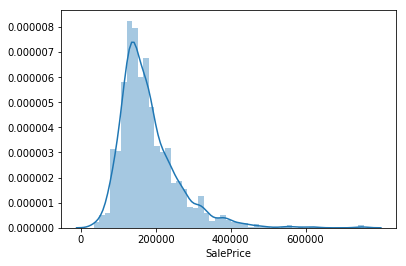

In [9]:
g = sns.distplot(train['SalePrice'])
g.set_xticks(np.arange(0,800000,200000))

The target variable has a positive skewed distribution. Thus, it will be log-transformed for the training phase and then exponentiated for correct submission format.

In [10]:
# Skewness analysis of other numerical features
num_cols = train._get_numeric_data().columns
num_cols = np.delete(num_cols,[0,len(num_cols)-1]) # Deleting ID and SalePrice (target variable)
feat_skewness = train[num_cols].apply(lambda x: skew(x.dropna()))
feat_skewness

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [11]:
str_cols = train.dtypes[train.dtypes == 'object'].index.values

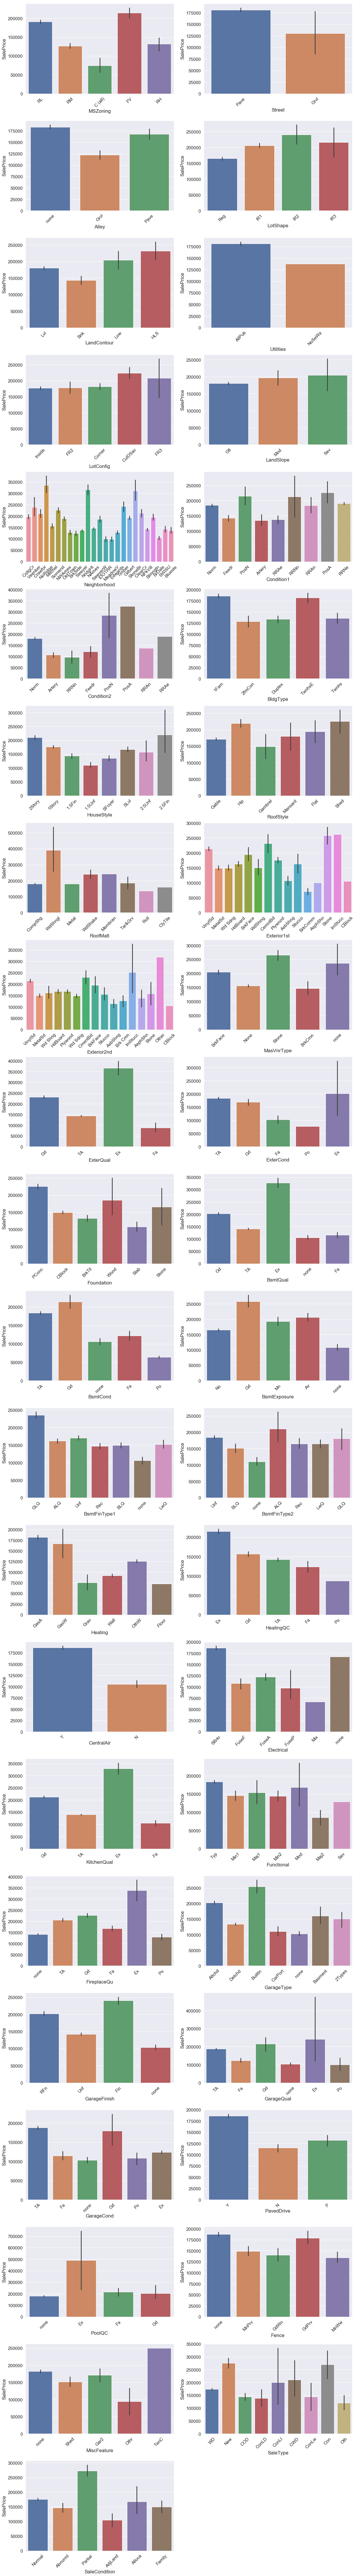

In [12]:
plt.figure(figsize=(20, 160))
sns.set(font_scale=1.4)
plt.subplots_adjust(hspace=0.3)

i=1
for col in str_cols:
    train[col].fillna('none', inplace = True)
    plt.subplot(22, 2, i);
    plot = sns.barplot(x=col, y='SalePrice', data=train);
    for tick in plot.get_xticklabels():
        tick.set_rotation(45)
    i += 1

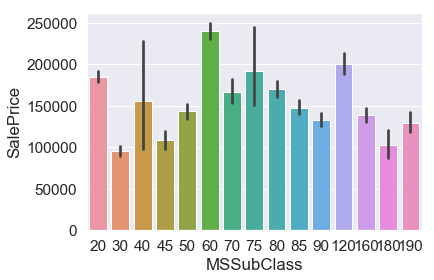

In [13]:
sns.barplot(x='MSSubClass', y='SalePrice', data=train)

In [14]:
train.groupby(['MSSubClass'])['SalePrice'].sum().sort_values().index.values

array([ 40, 180,  45,  85,  75, 190,  30,  90, 160,  80,  70, 120,  50,
        60,  20], dtype=int64)

In [17]:
train.groupby(['YrSold'])['SalePrice'].mean().sort_values().index.values

array([2008, 2010, 2009, 2006, 2007], dtype=int64)

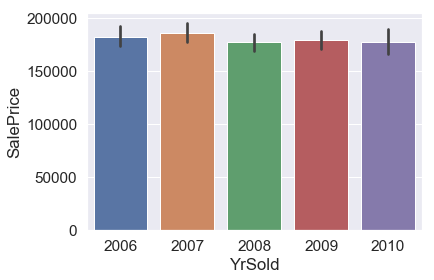

In [16]:
sns.barplot(x='YrSold', y='SalePrice', data=train)